In [315]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# initialize "dedispersed" burst

burst = []
for i in range(100):
    burst.append(np.zeros(100))

In [4]:
burst = np.array(burst)

In [5]:
print(burst.shape)

(100, 100)


In [302]:
def make_burst(DM, width):
    burst = np.zeros( (10,800) )
    DM = DM
    width = width
    for i in range(10):
        for j in range(width):
            burst[i][j] = 1
    delay_0 = int(4140.*DM*1000/(1500-50*0)**2)
    for i in range(10):
        delay = int(4140.*DM*1000/(1500-50*i)**2)
        burst[i] = np.roll(burst[i], delay-delay_0)
#    plt.imshow(burst[:,:100])
#    plt.show()
    return burst

#make_burst(200)

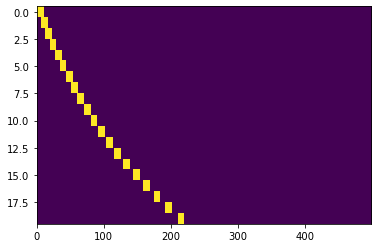

In [129]:
burst100 = make_burst(100, 10)
plt.imshow(burst100[:,:500], interpolation = 'nearest')
plt.gca().set_aspect('auto')
plt.show()

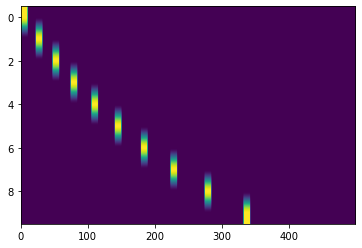

In [124]:
randDM = np.random.uniform(low=5, high=200)
randwidth = int(np.random.uniform(low=1, high=20))
test_burst = make_burst(randDM, randwidth)
plt.imshow(test_burst[:,:500])
plt.gca().set_aspect('auto')
plt.show()

In [303]:
def generate_data(qty):
    data = []
    qty = qty
    for i in range(qty):
        DM = np.random.uniform(low=5, high=200)
        width = int(np.random.uniform(low=1, high=20))
        burst = make_burst(DM, width)
        data.append([DM, burst])
    return data

In [304]:
data = generate_data(1000)

In [248]:
data_2d = generate_data(10000)

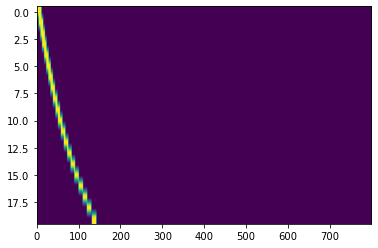

In [287]:
plt.imshow(data[18][1][:,:800])
plt.gca().set_aspect('auto')
plt.show()

In [73]:
d = []
for i in range(10):
    d.append(int(4140.*200*1000/(1500-50*i)**2))
print(d)

[368, 393, 422, 454, 489, 529, 575, 626, 684, 751]


In [305]:
data = np.array(data)
print(data.shape)
x = data[:,1]
y = data[:,0]

(5000, 2)


/var/folders/b_/601lqv7d3mg79nf_9cc89gd40000gn/T/ipykernel_34589/2962232681.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


In [250]:
data_2d = np.array(data_2d)
print(data_2d.shape)
x2 = data_2d[:,1]
y2 = data_2d[:,0]

(10000, 2)


/var/folders/b_/601lqv7d3mg79nf_9cc89gd40000gn/T/ipykernel_34589/2853163764.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_2d = np.array(data_2d)


In [301]:
import torch.nn as nn
 
# Define the model
model = nn.Sequential(
    nn.Linear(8000, 2**13),
    nn.ReLU(),
    nn.Linear(2**13, 2**6),
    nn.ReLU(),
    nn.Linear(2**6, 2**3),
    nn.ReLU(),
    nn.Linear(2**3, 1)
)

In [275]:
#import torch.nn.functional as F

model_2d = nn.Sequential(
    nn.Conv2d(16, 8, 2, 2, bias=False),
    nn.ReLU(),
    nn.Conv2d(8, 16, 2, 2, bias=False),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(1000, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

In [85]:
import torch.optim as optim
 
# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [86]:
import copy
import torch
import tqdm
from sklearn.model_selection import train_test_split

In [306]:
# train-test split of the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True)
for i in range(len(x_train)):
    x_train[i] = x_train[i].flatten()
for i in range(len(x_test)):
    x_test[i] = x_test[i].flatten()
print(x_train)
#for i in range(len(x_train)):
#    x_train[i] = torch.tensor(x_train[i], dtype=torch.float32)
#for i in range(len(x_test)):
#    x_test[i] = torch.tensor(x_test[i], dtype=torch.float32)

[array([1., 1., 1., ..., 0., 0., 0.]) array([1., 1., 1., ..., 0., 0., 0.])
 array([1., 1., 1., ..., 0., 0., 0.]) ...
 array([1., 1., 1., ..., 0., 0., 0.]) array([1., 1., 1., ..., 0., 0., 0.])
 array([1., 1., 1., ..., 0., 0., 0.])]


In [251]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.7, shuffle=True)

In [252]:
x2_train = [torch.tensor(x2_train[i], dtype=torch.float64) for i in range(len(x2_train))]

In [253]:
x2_test = [torch.tensor(x2_test[i], dtype=torch.float64) for i in range(len(x2_test))]
#y2_train = [torch.tensor(y2_train[i]) for i in range(len(y2_train))]
#y2_test = [torch.tensor(y2_test[i]) for i in range(len(y2_test))]

In [254]:
x2_train = torch.stack(x2_train)

In [255]:
x2_test = torch.stack(x2_test)
#y2_train = torch.cat(y2_train)
#y2_test = torch.cat(y2_test)

In [256]:
print(x2_train.size())

torch.Size([7000, 20, 800])


In [161]:
y2_train = torch.cat(y2_train)
print(y2_train)

RuntimeError: zero-dimensional tensor (at position 0) cannot be concatenated

In [307]:
x_train=np.vstack(x_train).astype(float)
print(x_train.shape)

(3500, 8000)


In [308]:
x_test = np.vstack(x_test).astype(float)
print(x_test.shape)

(1500, 8000)


In [309]:
y_train = np.vstack(y_train).astype(float)
print(y_train.shape)
y_test = np.vstack(y_test).astype(float)
print(y_test.shape)

(3500, 1)
(1500, 1)


In [190]:
print(y2_train)

[75.87762302179658 103.6354918022069 60.10369987100339 191.78919152684966
 129.8207692426845 163.10213571077534 47.05710203856464 190.68635992349817
 53.15122559969493 20.7608802653062 174.94254937330172 9.245630598885947
 23.32497995943448 168.52609557402562 61.36186456828245 121.55789871379568
 111.3047051482111 47.024039380074626 152.35629251153057 55.62036463081255
 98.99344318304962 184.79824615715853 161.05261279441564
 107.08642938903235 131.96773067749294 23.894170236390643
 27.066582445487903 92.23463965567922 125.85863604772716
 152.73623079224583 192.2829032429748 61.30575401107982 100.63444818175633
 15.848184407131315 72.29175285088115 34.72499616416344 169.97738725352835
 130.73131033563436 18.60243655608641 40.19566431205841 93.31930671695986
 112.58516305934374 142.73666722662816 90.73925370425198
 170.84506693276379 92.97555287955883 104.17334660403114
 154.04611496573673 54.88259711112555 14.135667080070409 16.97586593069206
 56.84856671147394 41.16044314682591 135.10

In [257]:
y2_train = np.vstack(y2_train).astype(float)
print(y2_train.shape)
y2_test = np.vstack(y2_test).astype(float)
print(y2_test.shape)

y2_train = torch.tensor(y2_train, dtype=torch.float64)
y2_test = torch.tensor(y2_test, dtype=torch.float64)

(7000, 1)
(3000, 1)


In [310]:
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [311]:
# training parameters
n_epochs = 20   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(x_train), batch_size)

In [312]:
### Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

In [313]:
# training loop
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            x_batch = x_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    print('Epoch', epoch, 'done')
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(x_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

Epoch 0 done
Epoch 1 done
Epoch 2 done
Epoch 3 done
Epoch 4 done
Epoch 5 done
Epoch 6 done
Epoch 7 done
Epoch 8 done
Epoch 9 done
Epoch 10 done
Epoch 11 done
Epoch 12 done
Epoch 13 done
Epoch 14 done
Epoch 15 done
Epoch 16 done
Epoch 17 done
Epoch 18 done
Epoch 19 done


In [276]:
model_2d = model_2d.double()
history_2d = []
# training loop
for epoch in range(n_epochs):
    model_2d.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            x_batch = x2_train[start:start+batch_size]
            y_batch = y2_train[start:start+batch_size]
            # forward pass
            y_pred = model_2d(x_batch)
            #torch.transpose(your_tensor, 0, 1)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    print('epoch', epoch, 'done')
    # evaluate accuracy at end of each epoch
    model_2d.eval()
    y_pred = model_2d(x2_test[batch_size*epoch:batch_size*(epoch+1)])
    mse = loss_fn(y_pred, y2_test[batch_size*epoch:batch_size*(epoch+1)])
    mse = float(mse)
    history_2d.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

epoch 0 done
epoch 1 done
epoch 2 done
epoch 3 done
epoch 4 done
epoch 5 done
epoch 6 done
epoch 7 done
epoch 8 done
epoch 9 done
epoch 10 done
epoch 11 done
epoch 12 done
epoch 13 done
epoch 14 done
epoch 15 done
epoch 16 done
epoch 17 done
epoch 18 done
epoch 19 done
epoch 20 done
epoch 21 done
epoch 22 done
epoch 23 done
epoch 24 done
epoch 25 done
epoch 26 done
epoch 27 done
epoch 28 done
epoch 29 done


In [95]:
print(n_epochs)

10


In [96]:
# restore model and return best accuracy
model.load_state_dict(best_weights)

<All keys matched successfully>

MSE: 13845.76
RMSE: 117.67


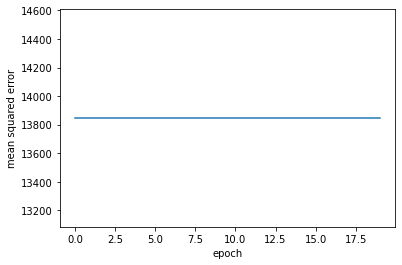

In [314]:
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.show()

MSE: 6027.17
RMSE: 77.63


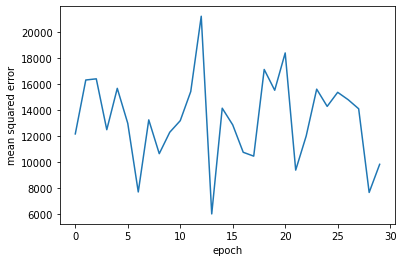

In [277]:
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history_2d)
plt.ylabel('mean squared error')
plt.xlabel('epoch')
plt.show()

In [117]:
burst100 = burst100.flatten()
#burst100 = np.vstack(burst100).astype(np.float)
burst100 = torch.tensor(burst100, dtype=torch.float32)
print(burst100.shape)
y_pred = model(burst100)
print(y_pred.data)

torch.Size([8000])
tensor([95.3375])


/var/folders/b_/601lqv7d3mg79nf_9cc89gd40000gn/T/ipykernel_34589/2747598020.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  burst100 = torch.tensor(burst100, dtype=torch.float32)
